In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


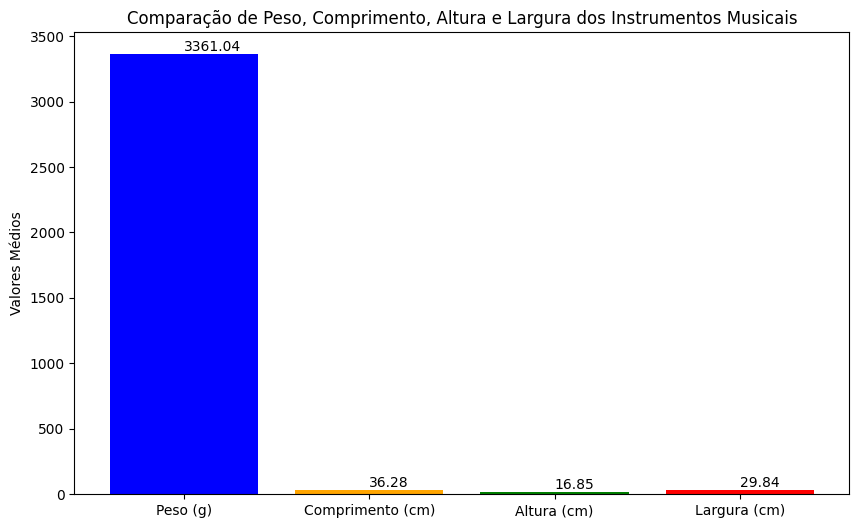

Média de Peso: 3361.04 g
Média de Comprimento: 36.28 cm
Média de Altura: 16.85 cm
Média de Largura: 29.84 cm


In [32]:
products = pd.read_csv('/content/drive/MyDrive/olist_products_dataset.csv', sep=',' , encoding='latin-1', on_bad_lines='skip')

products = products.drop_duplicates()

instrumentos = products[products['product_category_name'] == 'instrumentos_musicais']

peso_medio = instrumentos['product_weight_g'].mean()
comprimento_medio = instrumentos['product_length_cm'].mean()
altura_media = instrumentos['product_height_cm'].mean()
largura_media = instrumentos['product_width_cm'].mean()

medidas = [peso_medio, comprimento_medio, altura_media, largura_media]
labels = ['Peso (g)', 'Comprimento (cm)', 'Altura (cm)', 'Largura (cm)']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, medidas, color=['blue', 'orange', 'green', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.title('Comparação de Peso, Comprimento, Altura e Largura dos Instrumentos Musicais')
plt.ylabel('Valores Médios')
plt.show()

# Qual a média de peso, comprimento, altura e largura dos instrumentos musicais?

print(f'Média de Peso: {peso_medio:.2f} g')
print(f'Média de Comprimento: {comprimento_medio:.2f} cm')
print(f'Média de Altura: {altura_media:.2f} cm')
print(f'Média de Largura: {largura_media:.2f} cm')


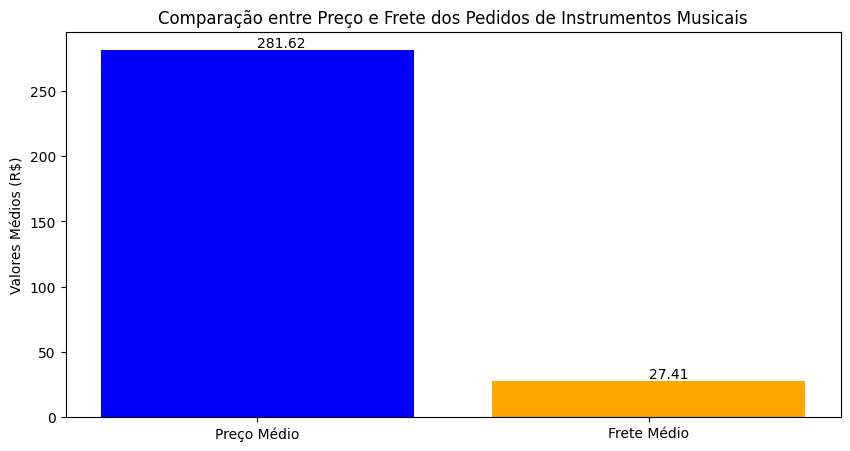

Média do preço dos pedidos de instrumentos musicais: R$281.62
Média do valor do frete dos pedidos de instrumentos musicais: R$27.41


In [33]:
orders = pd.read_csv('/content/drive/MyDrive/olist_order_items_dataset.csv', sep=',', encoding='latin-1', on_bad_lines='skip')

orders = orders.drop_duplicates()

instrumentos_orders = orders[orders['product_id'].isin(instrumentos['product_id'])]

media_preco = instrumentos_orders['price'].mean()
media_frete = instrumentos_orders['freight_value'].mean()

plt.figure(figsize=(10, 5))

labels = ['Preço Médio', 'Frete Médio']
valores = [media_preco, media_frete]

bars = plt.bar(labels, valores, color=['blue', 'orange'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Comparação entre Preço e Frete dos Pedidos de Instrumentos Musicais')
plt.ylabel('Valores Médios (R$)')
plt.show()

# Qual a média de preço e frete de pedidos de instrumentos musicais?

print(f'Média do preço dos pedidos de instrumentos musicais: R${media_preco:.2f}')
print(f'Média do valor do frete dos pedidos de instrumentos musicais: R${media_frete:.2f}')


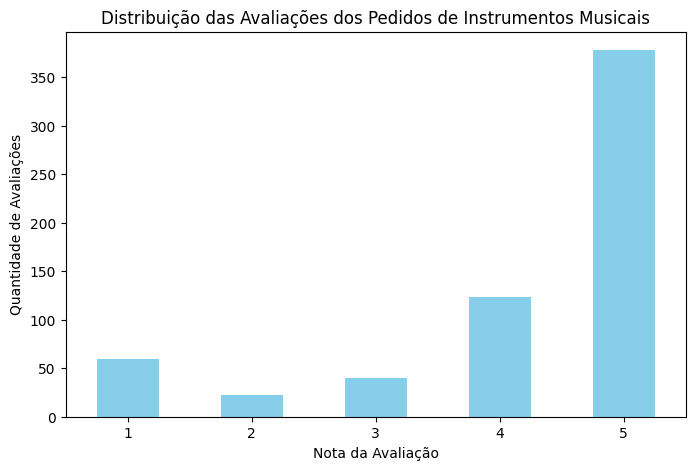

Média das avaliações dos pedidos de instrumentos musicais: 4.18


In [34]:
reviews = pd.read_csv('/content/drive/MyDrive/olist_order_reviews_dataset.csv', sep=',', encoding='latin-1', on_bad_lines='skip')

reviews = reviews.drop_duplicates()

avaliacoes_instrumentos = reviews[reviews['order_id'].isin(instrumentos_orders['order_id'])]

media_avaliacao = avaliacoes_instrumentos['review_score'].mean()

plt.figure(figsize=(8, 5))
avaliacoes_instrumentos['review_score'].value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title('Distribuição das Avaliações dos Pedidos de Instrumentos Musicais')
plt.xlabel('Nota da Avaliação')
plt.ylabel('Quantidade de Avaliações')
plt.xticks(rotation=0)
plt.show()

# Qual a média de avaliações dos pedidos de instrumentos?

print(f'Média das avaliações dos pedidos de instrumentos musicais: {media_avaliacao:.2f}')


<ipython-input-40-4ba600a47916>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reviews = merged_data.groupby('price_range')['review_score'].mean()


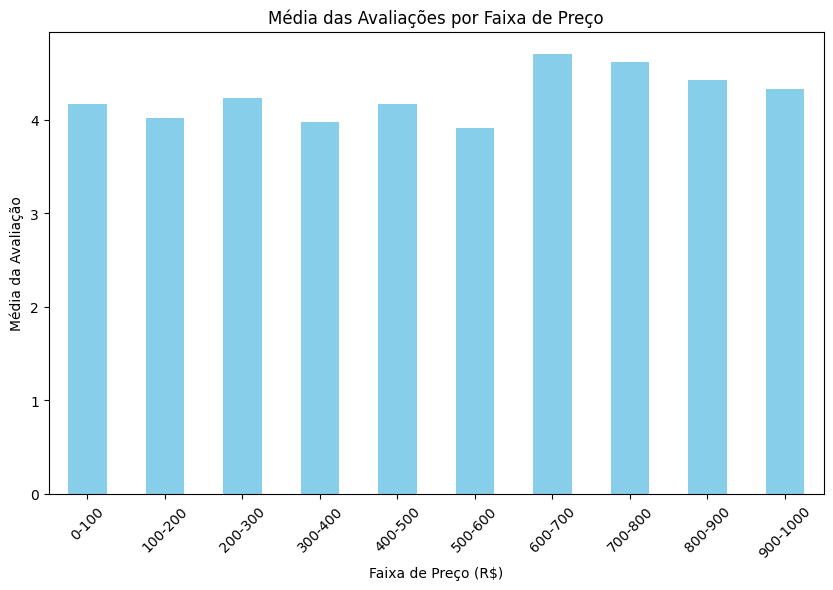

Média de avaliações na faixa de preço 900-1000: 4.333333333333333


In [40]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000']

merged_data['price_range'] = pd.cut(merged_data['price'], bins=bins, labels=labels)

avg_reviews = merged_data.groupby('price_range')['review_score'].mean()

# Gráfico de barras
plt.figure(figsize=(10, 6))
avg_reviews.plot(kind='bar', color='skyblue')
plt.title('Média das Avaliações por Faixa de Preço')
plt.xlabel('Faixa de Preço (R$)')
plt.ylabel('Média da Avaliação')
plt.xticks(rotation=45)
plt.show()

# Quais as médias de avaliações na faixa de preço 900-1000?

media_900_1000 = avg_reviews['900-1000']
print(f'Média de avaliações na faixa de preço 900-1000: {media_900_1000}')